### Overview of the dataset

Dataset Characteristics: CIC-IDS2017 dataset contains network traffic data for the development and evaluation of intrusion detection systems. The dataset is designed to be representative of modern network traffic and includes more than 2.8 million network packets captured over a period of seven days in a real network environment. The dataset includes normal traffic and seven different attack scenarios: Brute Force, Heartbleed, Botnet, DoS, DDoS, Web Attack and Infiltration. The dataset consists of 2830743 rows and 79 columns. In these columns, 78 of them are features that are numerical and the 'label' column is categorical

Data [link](https://csciitd-my.sharepoint.com/:f:/g/personal/tmangla_iitd_ac_in/EoNOWmPMifxDsInZccN-pugB_MQYztP4UWuyHrlV_N5LJQ?e=52ticB)

### Data characteristics 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step 1: Data exploration

In [2]:
def read_data(fname):
    df = pd.read_csv(fname)
    df.rename(columns={col: col.strip() for col in df.columns}, inplace=True)
    return df 
    
def pre_process(df):
    df = df[df.columns.tolist()[:-1]]
    df = df.fillna(0)
    df.replace([np.inf, -np.inf], -1, inplace=True)
    return df

In [3]:
# Loading the dataset
data1 = read_data("data/CIC-IDS-2017/Monday-WorkingHours.pcap_ISCX.csv.gz")
data2 = read_data('data/CIC-IDS-2017/Tuesday-WorkingHours.pcap_ISCX.csv.gz')
data3 = read_data('data/CIC-IDS-2017//Wednesday-workingHours.pcap_ISCX.csv.gz')
data4 = read_data('data/CIC-IDS-2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv.gz')
data5 = read_data('data/CIC-IDS-2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv.gz')
data6 = read_data('data/CIC-IDS-2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv.gz')

In [4]:
data1.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [5]:
data1.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
data = pd.concat([data1, data2, data3, data4, data5, data6]).reset_index()

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529918 entries, 0 to 529917
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             529918 non-null  int64  
 1   Flow Duration                529918 non-null  int64  
 2   Total Fwd Packets            529918 non-null  int64  
 3   Total Backward Packets       529918 non-null  int64  
 4   Total Length of Fwd Packets  529918 non-null  int64  
 5   Total Length of Bwd Packets  529918 non-null  int64  
 6   Fwd Packet Length Max        529918 non-null  int64  
 7   Fwd Packet Length Min        529918 non-null  int64  
 8   Fwd Packet Length Mean       529918 non-null  float64
 9   Fwd Packet Length Std        529918 non-null  float64
 10  Bwd Packet Length Max        529918 non-null  int64  
 11  Bwd Packet Length Min        529918 non-null  int64  
 12  Bwd Packet Length Mean       529918 non-null  float64
 13 

In [8]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
data1.describe().transpose()

Overview of Columns:


c:\Users\manis\OneDrive\Desktop\HSN_sem4\HSN\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\manis\OneDrive\Desktop\HSN_sem4\HSN\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
Destination Port,529918.0,1.064437e+04,2.139021e+04,0.000000e+00,53.000000,80.000000,443.000000,6.553500e+04
Flow Duration,529918.0,1.038927e+07,2.875195e+07,-1.000000e+00,176.000000,31303.000000,355744.750000,1.200000e+08
Total Fwd Packets,529918.0,1.039032e+01,8.924128e+02,1.000000e+00,2.000000,2.000000,4.000000,2.197590e+05
Total Backward Packets,529918.0,1.151710e+01,1.173319e+03,0.000000e+00,1.000000,2.000000,3.000000,2.919220e+05
Total Length of Fwd Packets,529918.0,5.324195e+02,6.228642e+03,0.000000e+00,18.000000,68.000000,187.000000,1.323378e+06
Total Length of Bwd Packets,529918.0,1.789841e+04,2.675470e+06,0.000000e+00,0.000000,144.000000,392.000000,6.554530e+08
Fwd Packet Length Max,529918.0,1.908972e+02,4.488338e+02,0.000000e+00,6.000000,40.000000,83.000000,2.336000e+04
Fwd Packet Length Min,529918.0,2.027728e+01,3.627579e+01,0.000000e+00,0.000000,6.000000,40.000000,2.293000e+03
Fwd Packet Length Mean,529918.0,5.074408e+01,9.196471e+01,0.000000e+00,6.000000,38.000000,53.000000,4.638923e+03
Fwd Packet Length Std,529918.0,5.745227e+01,1.465181e+02,0.000000e+00,0.000000,0.000000,26.162951,7.125597e+03


In [9]:
pd.options.display.max_columns = 80
data1

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3.000000e+06,5.000000e+05,4.000000,0.000000,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,5.000000e+05,0.000000,6,6,6.0,0.000000,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.0,0.000000,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.0,0.000000,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.0,0.000000,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,6.666667e+05,3.000000,0.000000,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,6.666667e+05,0.000000,6,6,6.0,0.000000,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529913,443,18738,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,6.404099e+02,1.067350e+02,18738.000000,0.000000,18738,18738,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,5.336749e+01,53.367489,6,6,6.0,0.000000,0.0,1,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,0,294,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
529914,53,60797,2,2,80,156,40,40,40.0,0.0,78,78,78.0,0.0,3.881770e+03,6.579272e+01,20265.666667,35095.968163,60791,3,3,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0,0,0,64,40,3.289636e+01,32.896360,40,78,55.2,20.813457,433.2,0,0,0,0,0,0,0,0,1,69.0,40.0,78.0,64,0,0,0,0,0,0,2,80,2,156,-1,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
529915,53,154,2,2,64,96,32,32,32.0,0.0,48,48,48.0,0.0,1.038961e+06,2.597403e+04,51.333333,50.639247,104,3,3,3.0,0.0,3,3,47,47.0,0.0,47,47,0,0,0,0,64,64,1.298701e+04,12987.012987,32,48,38.4,8.763561,76.8,0,0,0,0,0,0,0,0,1,48.0,32.0,48.0,64,0,0,0,0,0,0,2,64,2,96,-1,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
529916,53,155,2,2,80,144,40,40,40.0,0.0,72,72,72.0,0.0,1.445161e+06,2.580645e+04,51.666667,83.428612,148,3

#### Labels

In [10]:
data["Label"].value_counts()

Label
BENIGN                        1582344
DoS Hulk                       231073
PortScan                       158930
DoS GoldenEye                   10293
DoS slowloris                    5796
DoS Slowhttptest                 5499
FTP-Patator                      2827
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [11]:
print(data3['Label'].unique())
print(data3['Label'].value_counts())

['BENIGN' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed']
Label
BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: count, dtype: int64


In [12]:
print(data['Label'].unique())
print(data['Label'].value_counts())

['BENIGN' 'FTP-Patator' nan 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk'
 'DoS GoldenEye' 'Heartbleed' 'Web Attack � Brute Force'
 'Web Attack � XSS' 'Web Attack � Sql Injection' 'Infiltration' 'PortScan']
Label
BENIGN                        1582344
DoS Hulk                       231073
PortScan                       158930
DoS GoldenEye                   10293
DoS slowloris                    5796
DoS Slowhttptest                 5499
FTP-Patator                      2827
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [13]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}
label_col = "Attack Type"

# Creating a new column 'Label1' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['Label'].map(attack_map)
data['Attack Type'].value_counts()

Attack Type
BENIGN          1582344
DoS              252661
Port Scan        158930
Brute Force        2827
Web Attack         2180
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

### Step 2: Unsupervised learning

**Exercise**: Train an anomaly detection model using benign data from Monday and test it on the remaining days. Report the TPR, FPR and AUC for each day

In [49]:
#data = pd.concat([data2, data3, data4, data5, data6]).reset_index()
# data = data2 ## Tuesday data 
# data = data3 ## Wednesday data 
# data = data4 ## Thrusday_M data 
# data = data5 ## Thrusday_A data 
data = data6 ## Friday data 

In [15]:
## remove nan, inf, -inf val
def preprocess(df):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df = df.dropna()
    return df

In [50]:
data1 = preprocess(data1)           # data1 -> training data
data = preprocess(data)             # data  -> testing data

In [17]:
print(data["Label"].value_counts())
print()
print(data1["Label"].value_counts())

Label
BENIGN         28084
FTP-Patator     2826
Name: count, dtype: int64

Label
BENIGN    529481
Name: count, dtype: int64


In [51]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}
label_col = "Attack Type"

# Creating a new column 'Label1' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['Label'].map(attack_map)
data['Type'] = data['Attack Type'].apply(lambda x: x if x == "BENIGN" else "ATTACK")

data1['Attack Type'] = data1['Label'].map(attack_map)
data1['Type'] = data1['Attack Type'].apply(lambda x: x if x == "BENIGN" else "ATTACK")


C:\Users\manis\AppData\Local\Temp\ipykernel_18068\2952162524.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Attack Type'] = data['Label'].map(attack_map)
C:\Users\manis\AppData\Local\Temp\ipykernel_18068\2952162524.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type'] = data['Attack Type'].apply(lambda x: x if x == "BENIGN" else "ATTACK")


In [19]:
print(data1['Type'].value_counts())
print(data['Type'].value_counts())

Type
BENIGN    529481
Name: count, dtype: int64
Type
BENIGN    28084
ATTACK     2826
Name: count, dtype: int64


In [20]:
print(data1['Attack Type'].value_counts())
print(data['Attack Type'].value_counts())

Attack Type
BENIGN    529481
Name: count, dtype: int64
Attack Type
BENIGN         28084
Brute Force     2826
Name: count, dtype: int64


In [52]:
label_col = 'Type'
# features_col = ['Destination Port', 'Flow Duration', 
#        'Total Fwd Packets', 'Total Backward Packets', 
#        'Fwd Packet Length Mean', 'Fwd Packet Length Std', 
#        'Bwd Packet Length Mean', 'Bwd Packet Length Std', 
#        'Flow IAT Mean', 'Flow IAT Std',
#        'Fwd IAT Total', 'Fwd IAT Mean', 
#        'Bwd IAT Total', 'Bwd IAT Mean', 
#        'Fwd Packets/s', 'Bwd Packets/s',
#        'Packet Length Mean', 'Packet Length Std',
#        'Average Packet Size']
features_col = ['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min']

# Separate features and labels
X_train = data1[features_col]  # Training Features
y_train = data1[label_col]                 # Training Labels
X_test = data[features_col]   # Testing Features
y_test = data[label_col]   

In [22]:
## Unsupervised learning models
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

In [55]:
# Encode the labels (Benign = 0, Attack = 1)
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)  # Only needed for evaluation

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train your model

## CODE HERE
# One-Class SVM         -> skipped for not, as training it takes a lot of time (approx. 1 hour for Each day's data)
# model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05)  # nu: proportion of outliers
# model.fit(X_train_scaled)

# Local Outlier Factor (LOF) 
# model = LocalOutlierFactor(n_neighbors=10, contamination=0.02, novelty=True)
# model.fit(X_train_scaled)

# Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X_train_scaled)

IsolationForest(contamination=0.05, random_state=42)

AUC Score: 0.63
True Positive Rate (TPR): 0.0494
False Positive Rate (FPR): 0.0009


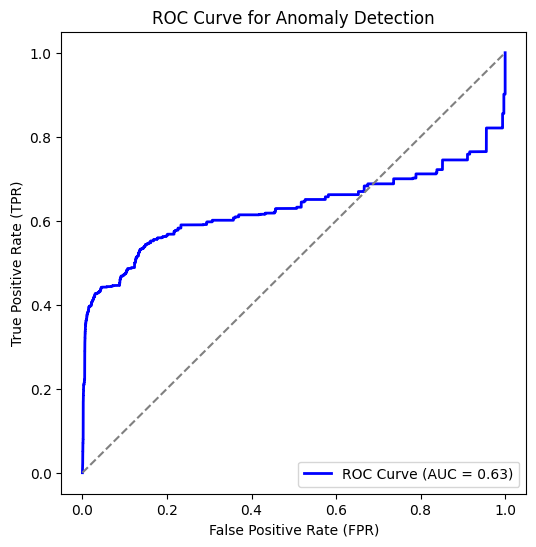

In [56]:
# Get the decision function values (anomaly scores)
y_pred_scores = model.decision_function(X_test_scaled)

# Convert scores to binary labels (-1 → 1 for anomaly, 1 → 0 for normal)
y_pred = np.where(y_pred_scores < 0, 1, 0)

# Compute TPR, FPR, and AUC based on the continuous scores
fpr, tpr, _ = roc_curve(y_test_encoded, -y_pred_scores)  
roc_auc = roc_auc_score(y_test_encoded, -y_pred_scores)

# Compute TPR and FPR using confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test_encoded, y_pred).ravel()
fpr_value = fp / (fp + tn)  # False Positive Rate (FPR)
tpr_value = tp / (tp + fn)  # True Positive Rate (TPR)

print(f"AUC Score: {roc_auc:.2f}")
print(f"True Positive Rate (TPR): {tpr_value:.4f}")
print(f"False Positive Rate (FPR): {fpr_value:.4f}")

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Anomaly Detection")
plt.legend(loc="lower right")
plt.show()

**Next Step**: Can you improve the accuracy of detection?

### Step 3: Supervised Learning [Ignore for now]

In [57]:
new_data = data
new_data.replace([np.inf, -np.inf], np.nan, inplace=True)
new_data = new_data.dropna()

C:\Users\manis\AppData\Local\Temp\ipykernel_18068\3895282640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.replace([np.inf, -np.inf], np.nan, inplace=True)


In [58]:
features_col = ['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min']

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_data['Attack Number'] = le.fit_transform(new_data['Attack Type'])

print(new_data['Attack Number'].unique())

[0 1]


In [60]:
features = new_data[features_col]
labels = new_data['Attack Number']

In [61]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [62]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators = 10, max_depth = 6, max_features = None, random_state = 0, n_jobs=-1)
rf1.fit(X_train, y_train)

cv_rf1 = cross_val_score(rf1, X_train, y_train, cv = 5)
print('Random Forest Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf1)))
print(f'\nMean cross-validation score: {cv_rf1.mean():.2f}')

Random Forest Model 1

Cross-validation scores: 0.999673773738786, 0.9997669812419899, 0.9996271612993429, 0.9997203709745072, 0.9997203709745072

Mean cross-validation score: 1.00


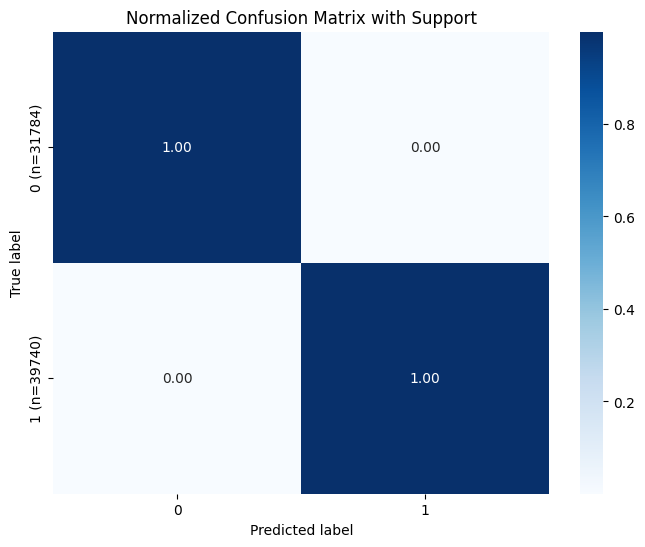

In [64]:
# Compute confusion matrix
y_pred_rf1 = rf1.predict(X_test)
conf_matrix_model1 = confusion_matrix(y_test, y_pred_rf1)

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix_model1.astype('float') / conf_matrix_model1.sum(axis=1, keepdims=True)

# Compute support (true count for each class)
support = conf_matrix_model1.sum(axis=1)

# Modify class labels to include support count
class_labels = [f"{cls} (n={count})" for cls, count in zip(rf1.classes_, support)]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust size if needed
sns.heatmap(conf_matrix_normalized, annot=True, cmap='Blues', ax=ax, fmt=".2f",
            xticklabels=rf1.classes_, yticklabels=class_labels)

# Labels
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Normalized Confusion Matrix with Support')

plt.show()